<a href="https://www.kaggle.com/code/anderaraujo/customer-segmentation-k-means?scriptVersionId=137882585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal as d
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

# Importing data

In [2]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep= '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df['Age'] = df.Year_Birth.apply(lambda x: 2021-x)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,54
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,3,11,0,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,40
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,65


<AxesSubplot:>

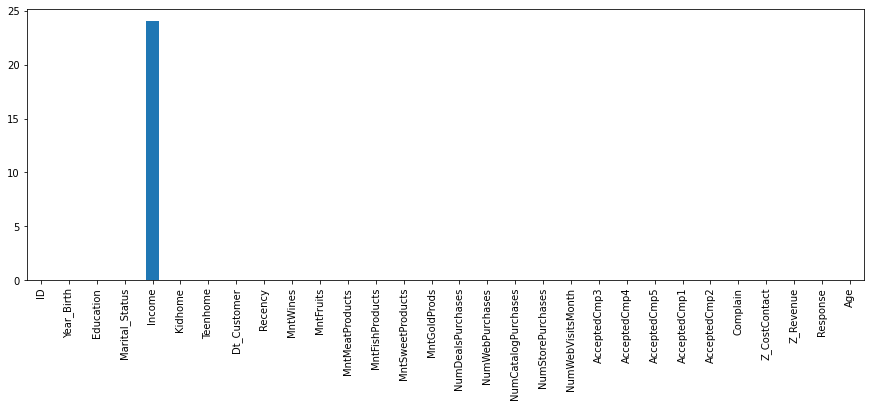

In [6]:
plt.figure(figsize=(15,5))
df.isnull().sum().plot(kind='bar')

In [7]:
df.Income.fillna(value = df.Income.mean(), inplace=True)
df.isnull().Income.sum()

0

In [8]:
df['Children'] = df['Kidhome']+df['Teenhome']
df['Total_Accepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
df.drop(['ID','Kidhome','Teenhome','Z_CostContact','Z_Revenue','Year_Birth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1, inplace=True)
df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted
0,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,88,...,3,8,10,4,7,0,1,64,0,0
1,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,1,...,2,1,1,2,5,0,0,67,2,0
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,1,8,2,10,4,0,0,56,0,0
3,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,3,...,2,2,0,4,6,0,0,37,1,0
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,5,5,3,6,5,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,118,...,2,9,3,4,5,0,0,54,1,0
2236,PhD,Together,64014.0,2014-10-06,56,406,0,30,0,0,...,7,8,2,5,7,0,0,75,3,1
2237,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,...,1,2,3,13,6,0,0,40,0,1
2238,Master,Together,69245.0,2014-01-24,8,428,30,214,80,30,...,2,6,5,10,3,0,0,65,1,0


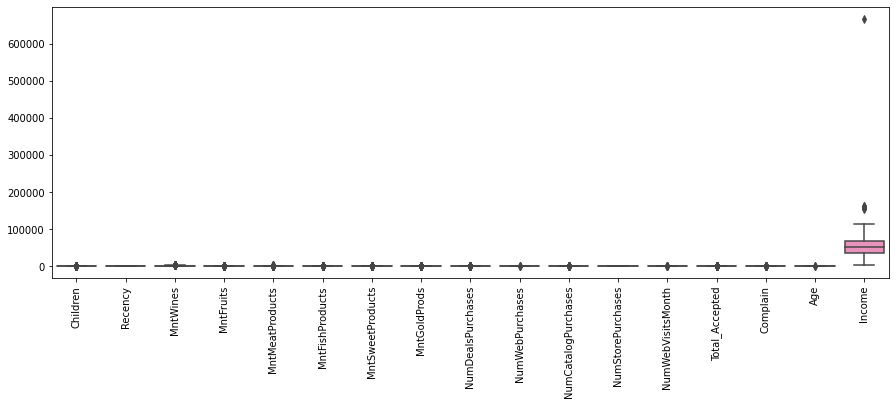

In [9]:
features = ['Children', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Total_Accepted', 'Complain',
       'Age','Income']
plt.figure(figsize=(15,5))
sns.boxplot(data = df[(features)])
plt.xticks(rotation=90)
plt.show()

In [10]:
# removing outlier
df.loc[(df.Income > 200000),'Income']= df.Income.mode()[0]

In [11]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51972.957270,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.149107,52.194196,0.950446,0.297768
std,21405.824379,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.356274,11.984069,0.751803,0.678381
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,44.000000,0.000000,0.000000
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,51.000000,1.000000,0.000000
75%,68275.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,62.000000,1.000000,0.000000
max,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,128.000000,3.000000,4.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

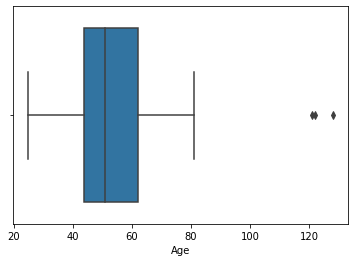

In [12]:
sns.boxplot(df.Age)

In [13]:
df.loc[(df.Age>100)]

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted
192,2n Cycle,Divorced,36640.0,2013-09-26,99,15,6,8,7,4,...,1,2,1,2,5,1,0,121,1,0
239,2n Cycle,Single,60182.0,2014-05-17,23,8,0,5,7,0,...,1,1,0,2,4,0,0,128,1,0
339,PhD,Together,83532.0,2013-09-26,36,755,144,562,104,64,...,1,4,6,4,1,0,0,122,0,1


In [14]:
df.drop(df[(df.Age>100)].index, axis=0, inplace=True)
df.describe()
 

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,51962.034101,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.008941,0.149307,52.098346,0.950827,0.297720
std,21406.617245,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.094152,0.356471,11.701917,0.752037,0.678615
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000
25%,35523.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,44.000000,0.000000,0.000000
50%,51717.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,51.000000,1.000000,0.000000
75%,68274.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,62.000000,1.000000,0.000000
max,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,81.000000,3.000000,4.000000


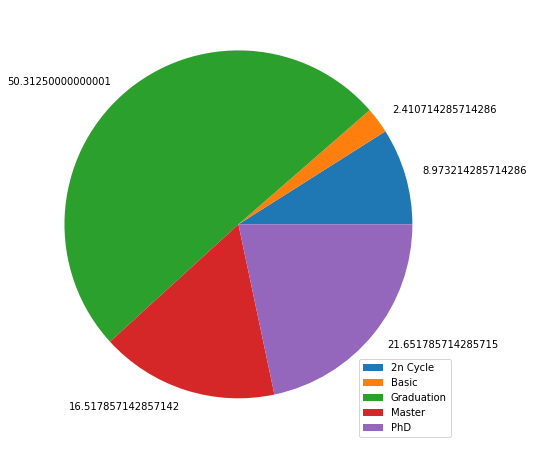

In [15]:
# What's is the education percentage?
educ_pct = df.groupby('Education').count().Marital_Status

plt.figure(figsize=(10,8))
plt.pie(educ_pct, labels= ((educ_pct.values/2240)*100))
plt.legend(educ_pct.index,loc=4)
plt.show()

Text(0.5, 1.0, 'Efect of Education on Wine consume')

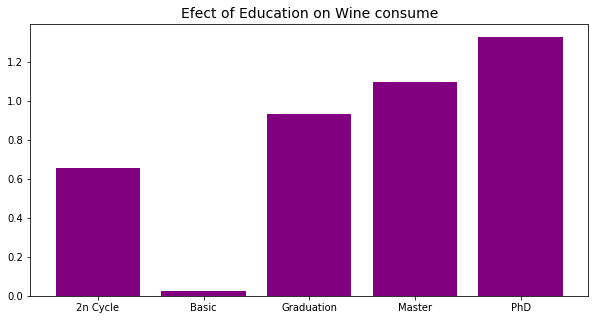

In [16]:
# How education affects consume of Wine?

plt.figure(figsize=(10,5))
plt.bar(df.groupby('Education').mean().index,
        df.groupby('Education').mean().MntWines/
        df.MntWines.mean(),color='purple')
plt.title('Efect of Education on Wine consume',fontsize=14)

Text(0.5, 1.0, 'Efect of Education on Meat consume')

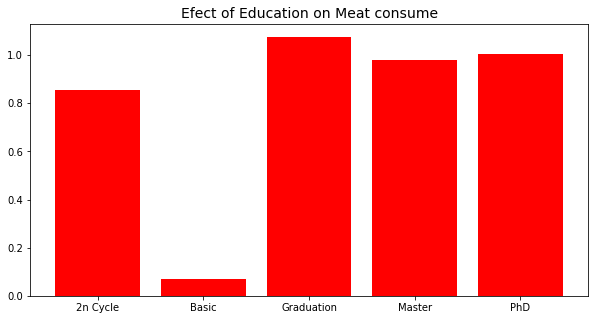

In [17]:
# How education affects consume of Meat?

plt.figure(figsize=(10,5))
plt.bar(df.groupby('Education').mean().index,
        df.groupby('Education').mean().MntMeatProducts/
        df.MntMeatProducts.mean(),color='red')
plt.title('Efect of Education on Meat consume',fontsize=14)

Text(0.5, 1.0, 'Efect of Education on Gold products consume')

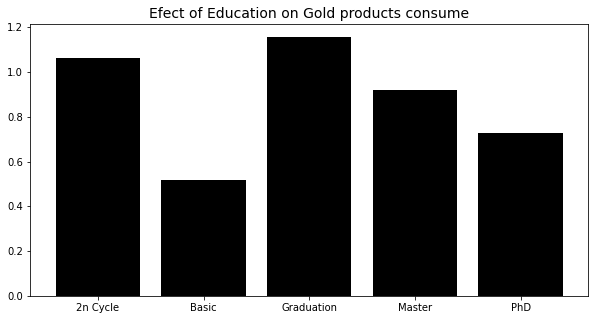

In [18]:
# How education affects consume of Gold Products?
plt.figure(figsize=(10,5))
plt.bar(df.groupby('Education').mean().index,
        df.groupby('Education').mean().MntGoldProds/
        df.MntGoldProds.mean(),color='black')
plt.title('Efect of Education on Gold products consume',fontsize=14)

Text(0.5, 1.0, 'Efect of Education on Fish products consume')

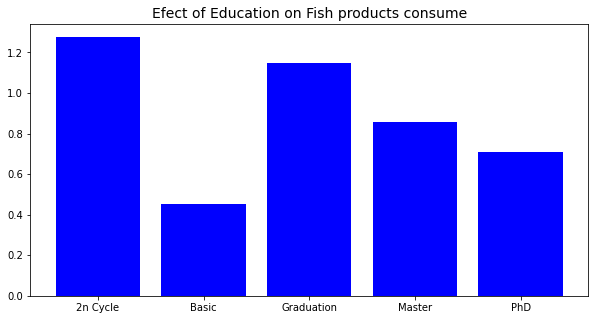

In [19]:
# How education affects consume of Fish?
plt.figure(figsize=(10,5))
plt.bar(df.groupby('Education').mean().index,
        df.groupby('Education').mean().MntFishProducts/
        df.MntFishProducts.mean(),color='blue')
plt.title('Efect of Education on Fish products consume',fontsize=14)

Text(0.5, 1.0, "Efect of Education on Costumer's income")

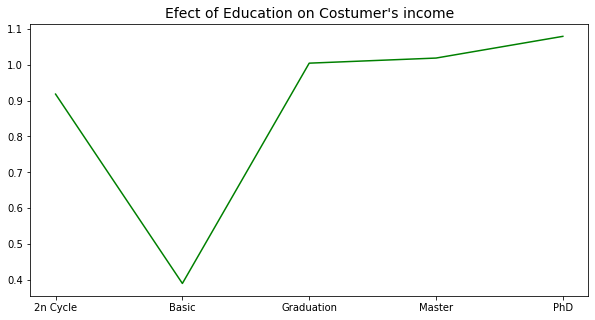

In [20]:
# How education affects in customer's income?

#income_anal

plt.figure(figsize=(10,5))
plt.plot(df.groupby('Education').mean().index, df.groupby('Education').mean().Income/
        df.Income.mean(), color='green')
plt.title('Efect of Education on Costumer\'s income',fontsize=14)

Text(0.5, 1.0, "Efect of Marital status on Costumer's income")

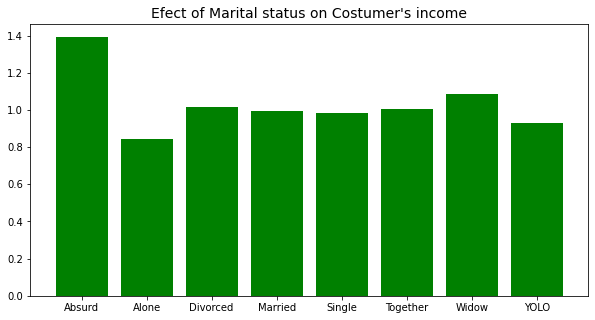

In [21]:
plt.figure(figsize=(10,5))
plt.bar(df.groupby('Marital_Status').mean().index, df.groupby('Marital_Status').mean().Income/
        df.Income.mean(), color='green')
plt.title('Efect of Marital status on Costumer\'s income',fontsize=14)

In [22]:
df.select_dtypes('object')

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [23]:
df1 = df.copy(deep=True)

In [24]:
le = LabelEncoder()
le.fit(df.Marital_Status.unique())
le.classes_
df1['Marital_St']=le.transform(df.Marital_Status)
df1.drop('Marital_Status',axis=1, inplace=True)
df1

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted,Marital_St
0,Graduation,58138.0,2012-04-09,58,635,88,546,172,88,88,...,8,10,4,7,0,1,64,0,0,4
1,Graduation,46344.0,2014-08-03,38,11,1,6,2,1,6,...,1,1,2,5,0,0,67,2,0,4
2,Graduation,71613.0,2013-08-21,26,426,49,127,111,21,42,...,8,2,10,4,0,0,56,0,0,5
3,Graduation,26646.0,2014-10-02,26,11,4,20,10,3,5,...,2,0,4,6,0,0,37,1,0,5
4,PhD,58293.0,2014-01-19,94,173,43,118,46,27,15,...,5,3,6,5,0,0,40,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,61223.0,2013-06-13,46,709,43,182,42,118,247,...,9,3,4,5,0,0,54,1,0,3
2236,PhD,64014.0,2014-10-06,56,406,0,30,0,0,8,...,8,2,5,7,0,0,75,3,1,5
2237,Graduation,56981.0,2014-01-25,91,908,48,217,32,12,24,...,2,3,13,6,0,0,40,0,1,2
2238,Master,69245.0,2014-01-24,8,428,30,214,80,30,61,...,6,5,10,3,0,0,65,1,0,5


In [25]:
df1.Education.loc[df['Education']=='Graduation']=3
df1.Education.loc[df['Education']=='Basic']=1
df1.Education.loc[df['Education']=='2n Cycle']=2
df1.Education.loc[df['Education']=='Master']=4
df1.Education.loc[df['Education']=='PhD']=5
df1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted,Marital_St
0,3,58138.0,2012-04-09,58,635,88,546,172,88,88,...,8,10,4,7,0,1,64,0,0,4
1,3,46344.0,2014-08-03,38,11,1,6,2,1,6,...,1,1,2,5,0,0,67,2,0,4
2,3,71613.0,2013-08-21,26,426,49,127,111,21,42,...,8,2,10,4,0,0,56,0,0,5
3,3,26646.0,2014-10-02,26,11,4,20,10,3,5,...,2,0,4,6,0,0,37,1,0,5
4,5,58293.0,2014-01-19,94,173,43,118,46,27,15,...,5,3,6,5,0,0,40,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,61223.0,2013-06-13,46,709,43,182,42,118,247,...,9,3,4,5,0,0,54,1,0,3
2236,5,64014.0,2014-10-06,56,406,0,30,0,0,8,...,8,2,5,7,0,0,75,3,1,5
2237,3,56981.0,2014-01-25,91,908,48,217,32,12,24,...,2,3,13,6,0,0,40,0,1,2
2238,4,69245.0,2014-01-24,8,428,30,214,80,30,61,...,6,5,10,3,0,0,65,1,0,5


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2237 non-null   object        
 1   Income               2237 non-null   float64       
 2   Dt_Customer          2237 non-null   datetime64[ns]
 3   Recency              2237 non-null   int64         
 4   MntWines             2237 non-null   int64         
 5   MntFruits            2237 non-null   int64         
 6   MntMeatProducts      2237 non-null   int64         
 7   MntFishProducts      2237 non-null   int64         
 8   MntSweetProducts     2237 non-null   int64         
 9   MntGoldProds         2237 non-null   int64         
 10  NumDealsPurchases    2237 non-null   int64         
 11  NumWebPurchases      2237 non-null   int64         
 12  NumCatalogPurchases  2237 non-null   int64         
 13  NumStorePurchases    2237 non-nul

In [27]:
df1['Dt_Customer']= df1['Dt_Customer'].astype('int64')
df1['Income'] = df1['Income'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2237 non-null   object
 1   Income               2237 non-null   int64 
 2   Dt_Customer          2237 non-null   int64 
 3   Recency              2237 non-null   int64 
 4   MntWines             2237 non-null   int64 
 5   MntFruits            2237 non-null   int64 
 6   MntMeatProducts      2237 non-null   int64 
 7   MntFishProducts      2237 non-null   int64 
 8   MntSweetProducts     2237 non-null   int64 
 9   MntGoldProds         2237 non-null   int64 
 10  NumDealsPurchases    2237 non-null   int64 
 11  NumWebPurchases      2237 non-null   int64 
 12  NumCatalogPurchases  2237 non-null   int64 
 13  NumStorePurchases    2237 non-null   int64 
 14  NumWebVisitsMonth    2237 non-null   int64 
 15  Complain             2237 non-null   int64 
 16  Respon

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(df1.values)
scaled.shape
df_scaled = pd.DataFrame(scaled, columns= df1.columns)
df_scaled

,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted,Marital_St
0,0.50,0.351086,0.086548,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.296296,0.357143,0.307692,0.35,0.0,1.0,0.696429,0.000000,0.00,0.571429
1,0.50,0.277680,0.882408,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,...,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.750000,0.666667,0.00,0.571429
2,0.50,0.434956,0.555974,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,...,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.553571,0.000000,0.00,0.714286
3,0.50,0.155079,0.938852,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,...,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.214286,0.333333,0.00,0.714286
4,1.00,0.352051,0.698024,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,...,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.267857,0.333333,0.00,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.50,0.370288,0.491063,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,...,0.333333,0.107143,0.307692,0.25,0.0,0.0,0.517857,0.333333,0.00,0.428571
2233,1.00,0.387659,0.942615,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,...,0.296296,0.071429,0.384615,0.35,0.0,0.0,0.892857,1.000000,0.25,0.714286
2234,0.50,0.343885,0.703669,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,...,0.074074,0.107143,1.000000,0.30,0.0,0.0,0.267857,0.000000,0.25,0.285714
2235,0.75,0.420217,0.702728,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,...,0.222222,0.178571,0.769231,0.15,0.0,0.0,0.714286,0.333333,0.00,0.714286


<AxesSubplot:>

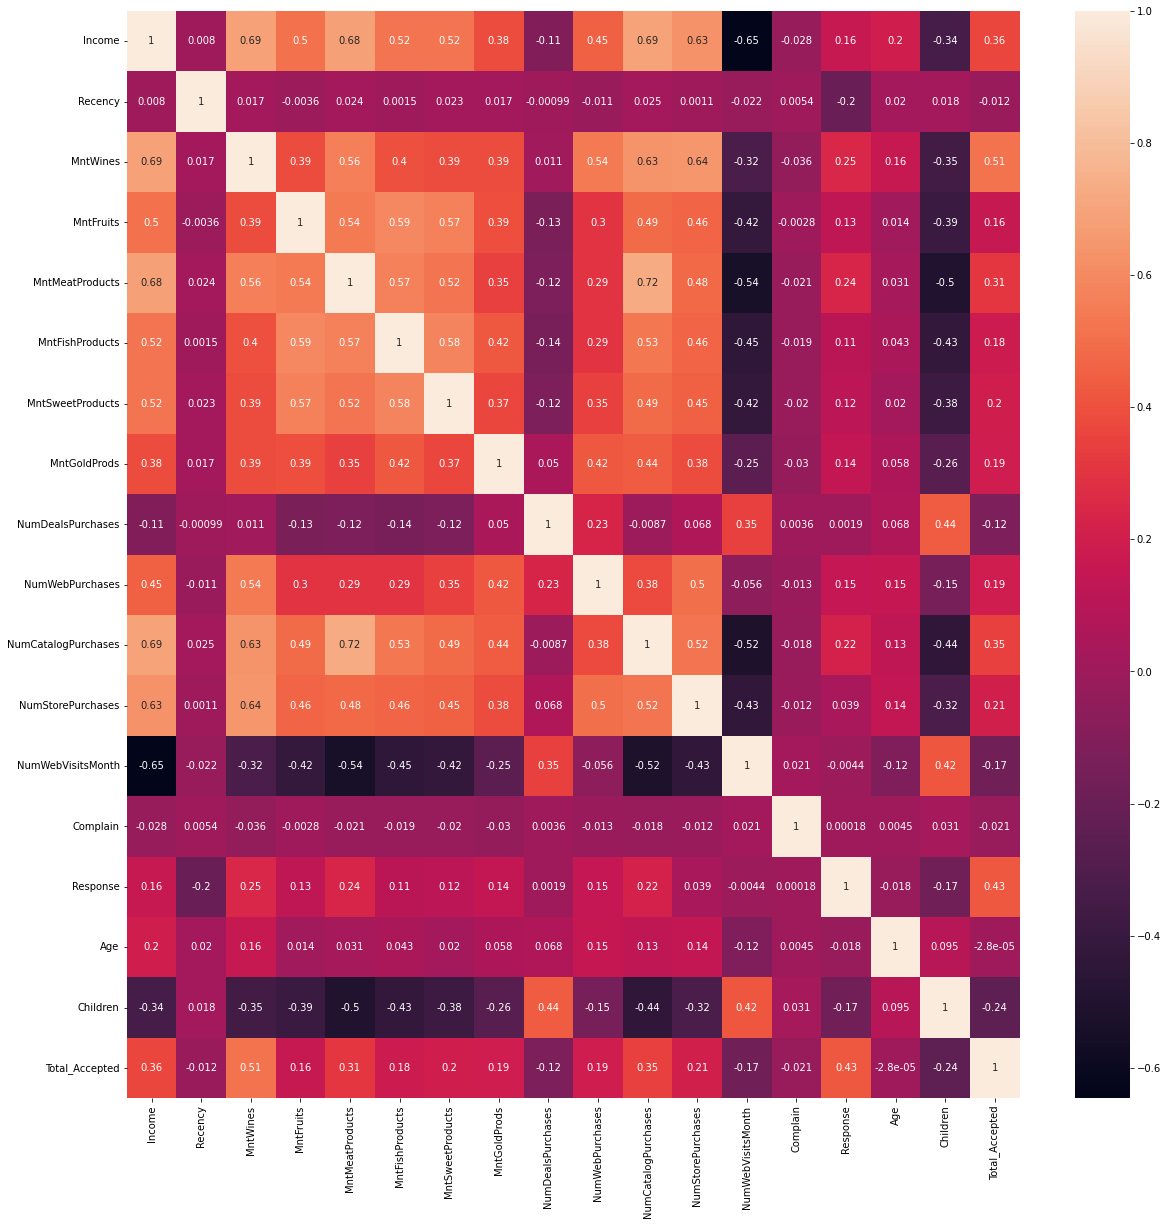

In [29]:
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'SSE')

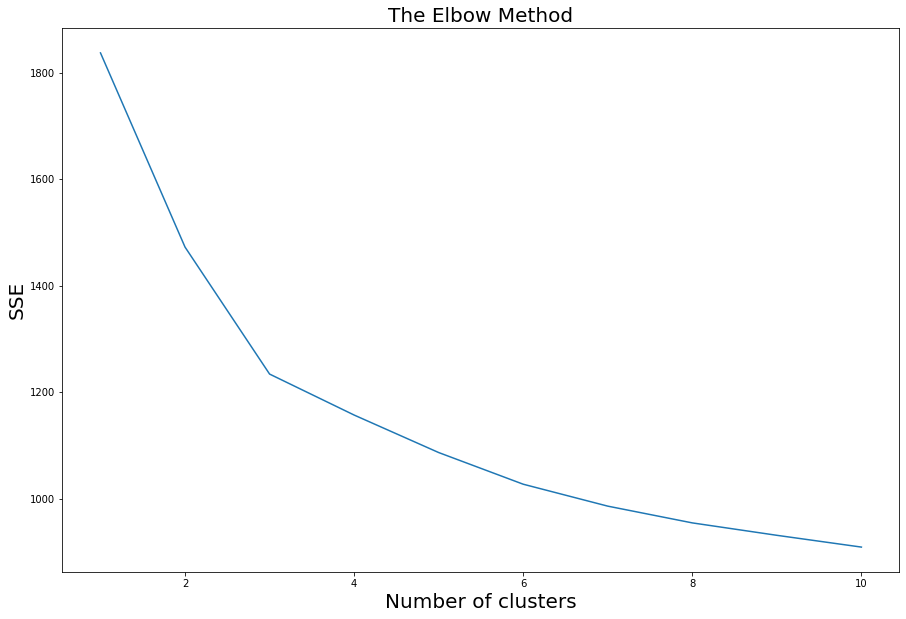

In [30]:
sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), sse )
plt.title('The Elbow Method', fontsize= 20)
plt.xlabel('Number of clusters',fontsize= 20)
plt.ylabel('SSE',fontsize= 20)
    
    

In [31]:
kmeans= KMeans(n_clusters = 3)
cluster = kmeans.fit(df_scaled)
cluster_pred = cluster.predict(df_scaled)
cluster_pred

array([1, 2, 0, ..., 0, 0, 1], dtype=int32)

In [32]:
df['Cluster'] = cluster_pred+1
df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Total_Accepted,Cluster
0,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,88,...,8,10,4,7,0,1,64,0,0,2
1,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,1,...,1,1,2,5,0,0,67,2,0,3
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,8,2,10,4,0,0,56,0,0,1
3,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,3,...,2,0,4,6,0,0,37,1,0,3
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,5,3,6,5,0,0,40,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,118,...,9,3,4,5,0,0,54,1,0,1
2236,PhD,Together,64014.0,2014-10-06,56,406,0,30,0,0,...,8,2,5,7,0,0,75,3,1,3
2237,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,...,2,3,13,6,0,0,40,0,1,1
2238,Master,Together,69245.0,2014-01-24,8,428,30,214,80,30,...,6,5,10,3,0,0,65,1,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


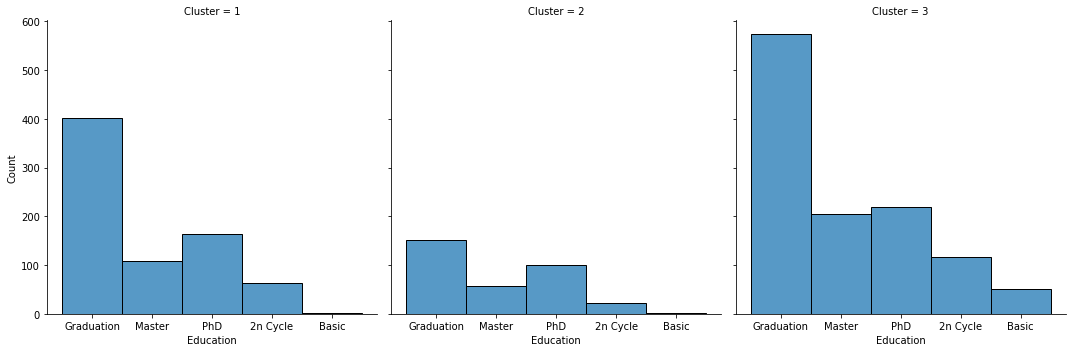

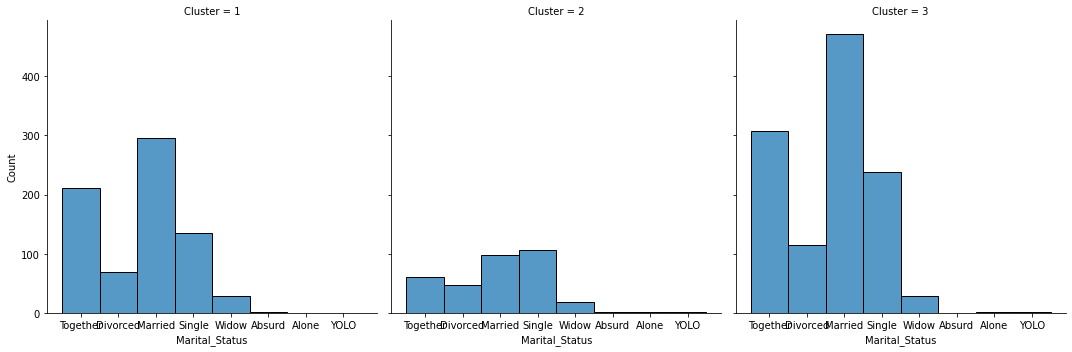

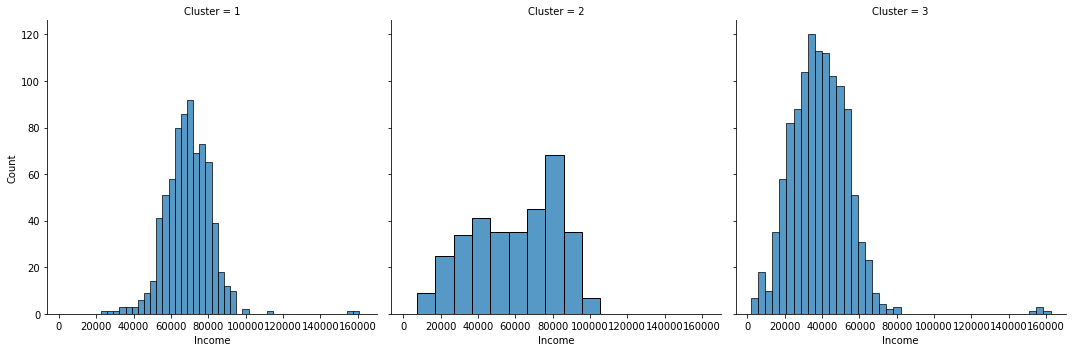

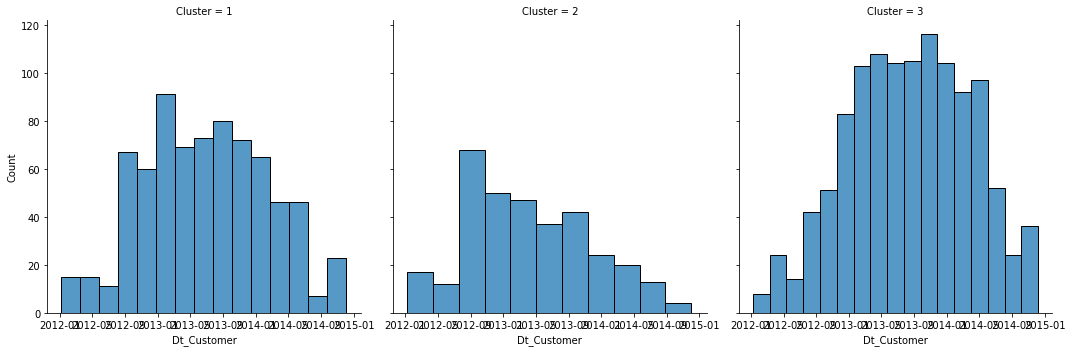

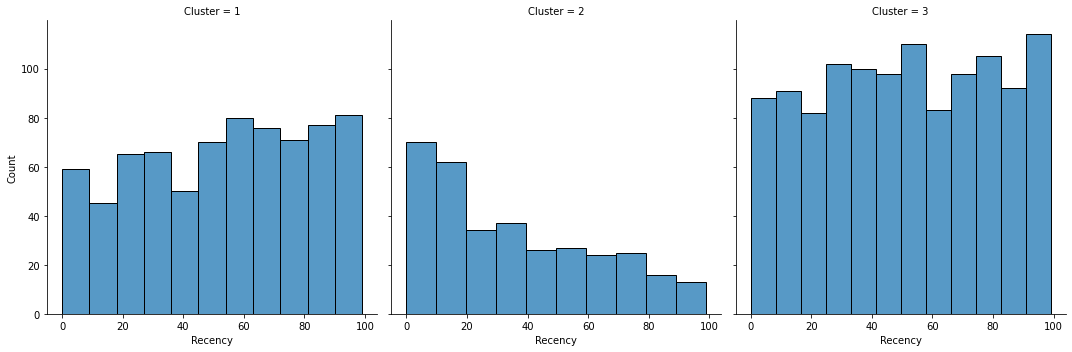

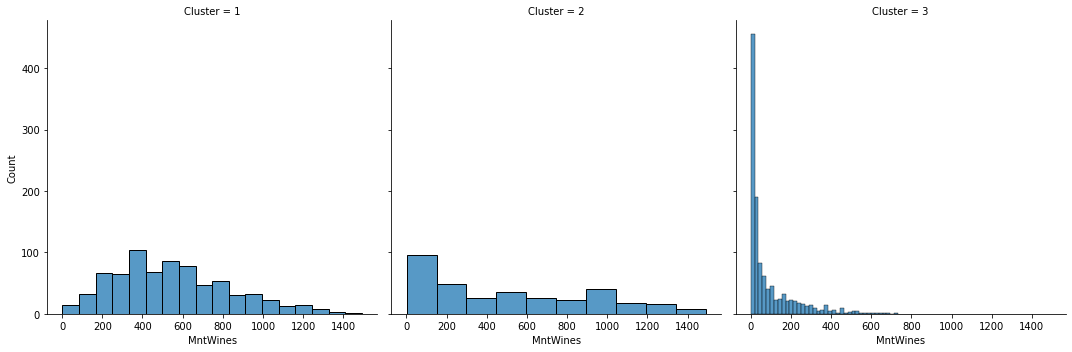

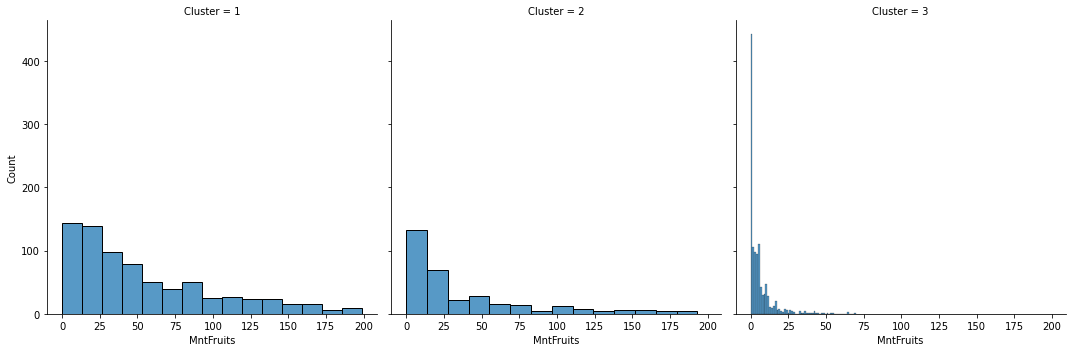

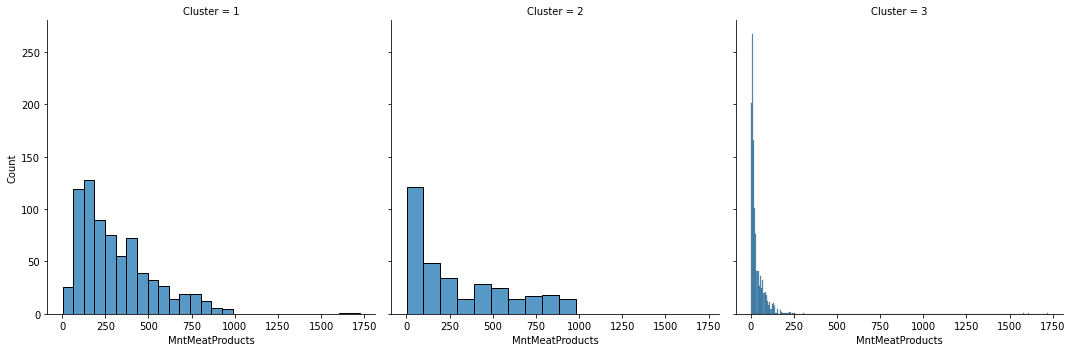

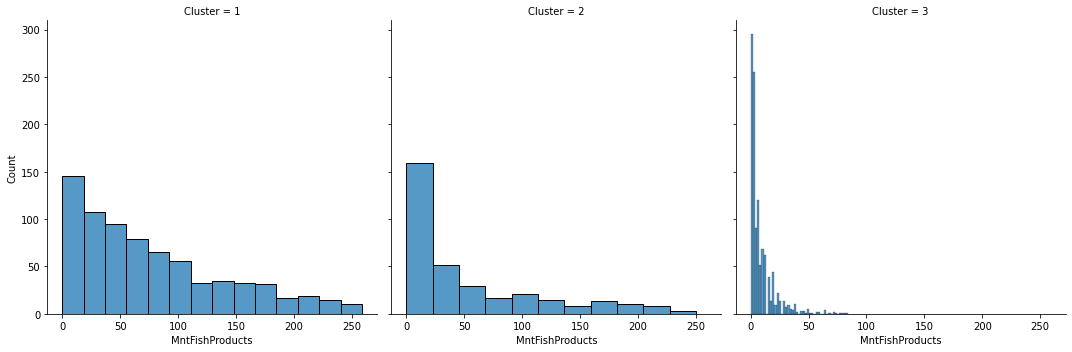

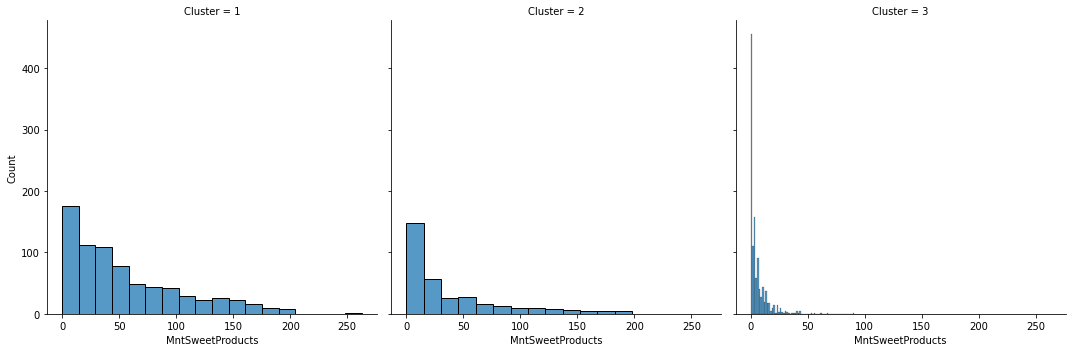

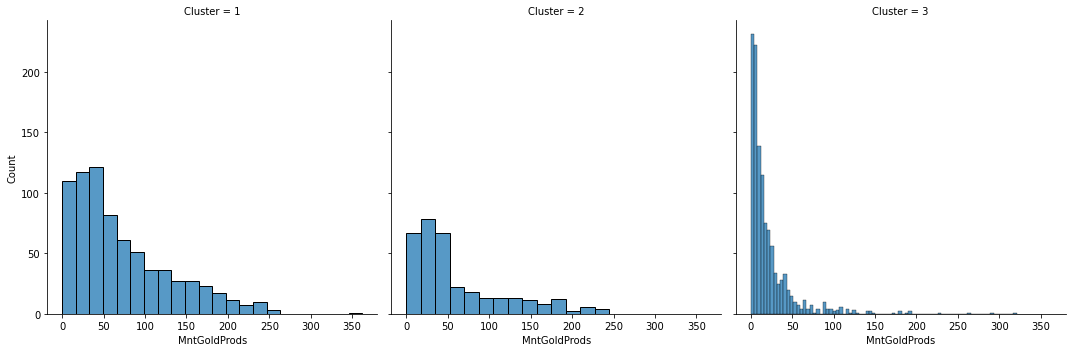

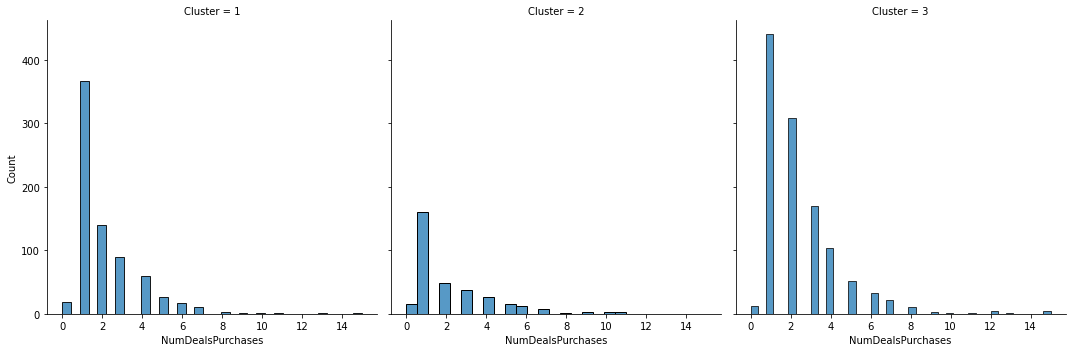

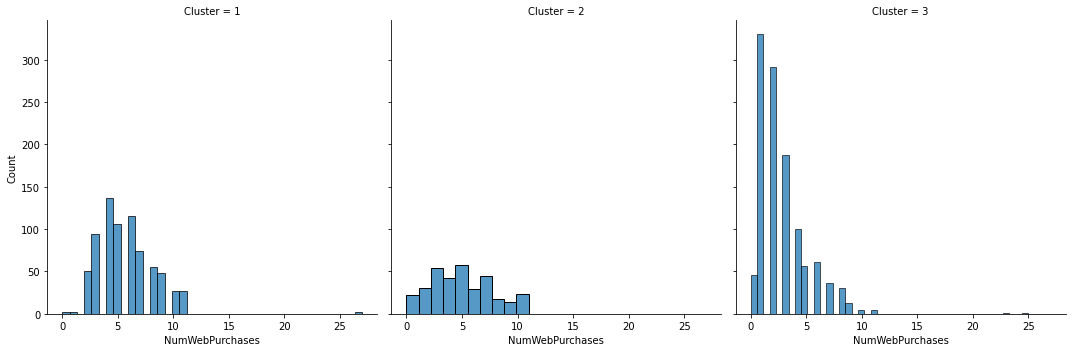

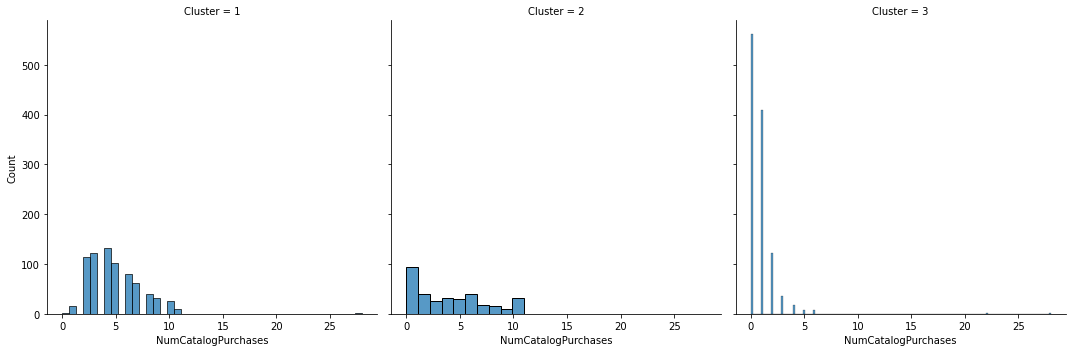

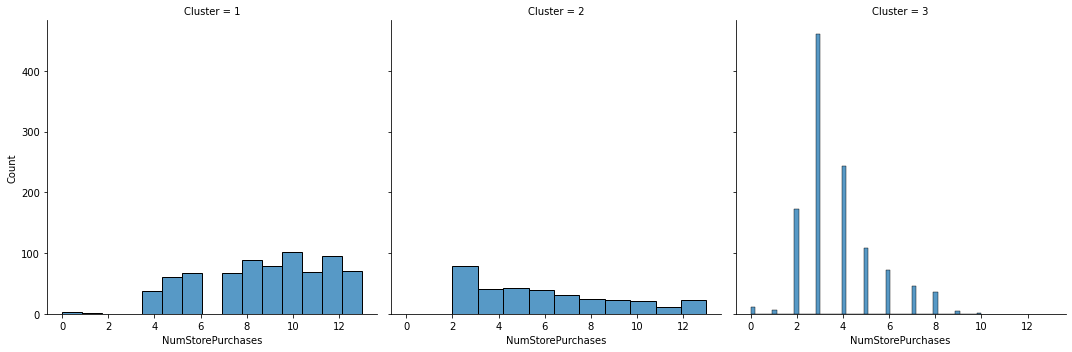

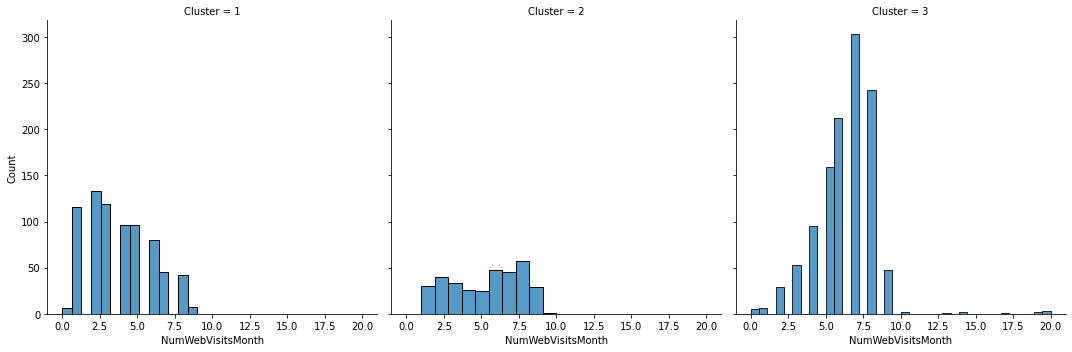

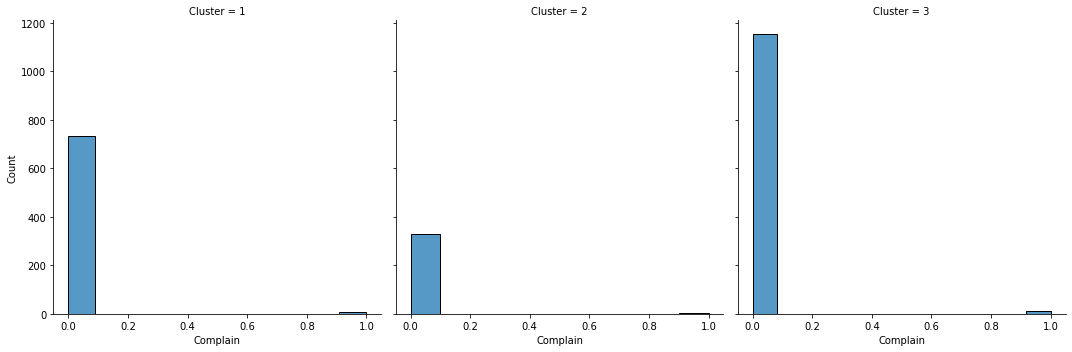

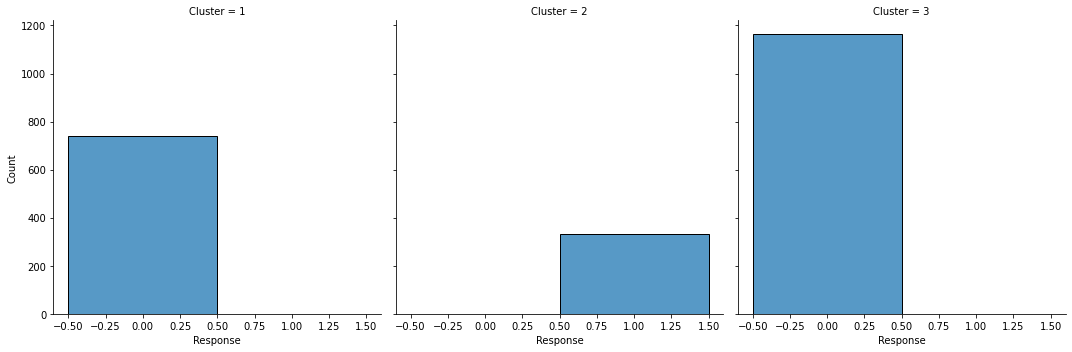

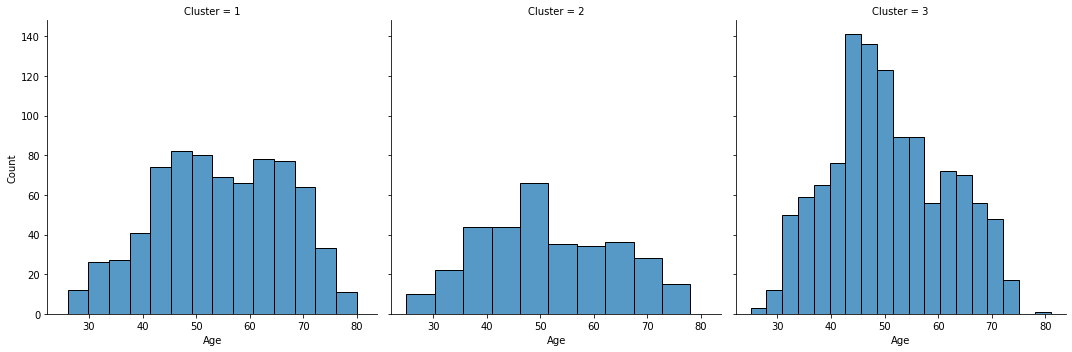

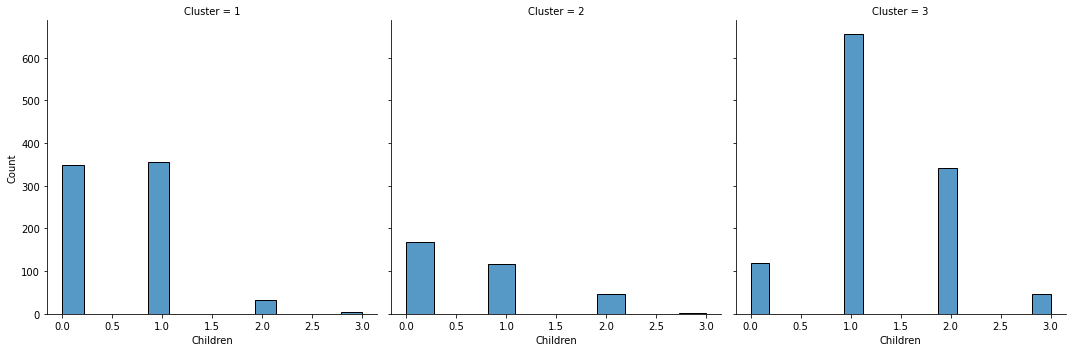

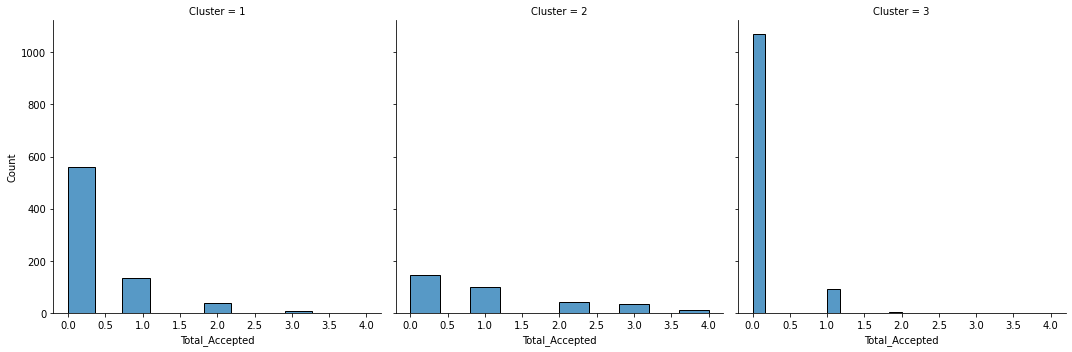

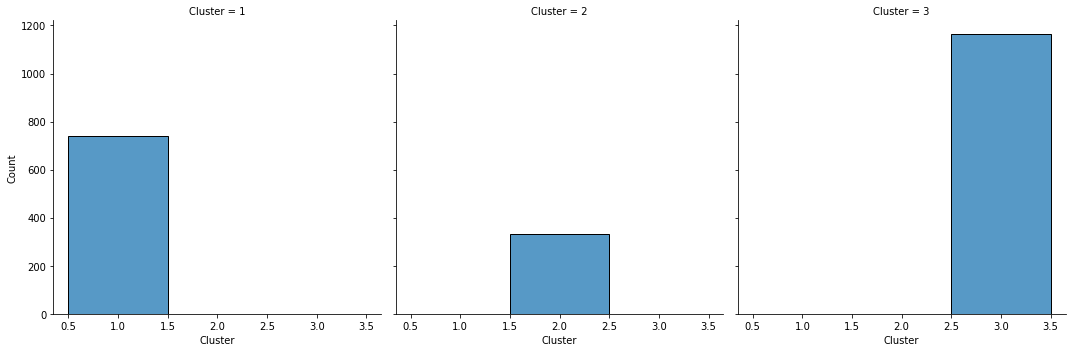

In [33]:
for i in df:
    g = sns.FacetGrid(df, col= 'Cluster', height=5, aspect= 1)
    g.map(sns.histplot, i)
    
    